In [18]:
import pandas as pd
import numpy as np
import joblib as jb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from satellite_bathymetry.preprocessing import get_coord_from_pixel_pos, get_pixel_from_coord, ndwi, pixel_ndwi, pixel_log_ratio
import xgboost as XGB
from lightgbm import LGBMRegressor
import lightgbm as lgb
from bayes_opt import BayesianOptimization
from scipy import stats

In [10]:
train_path = 'generated/train_window_split_RAW.pkl.z'
val_path = 'generated/val_window_split_RAW.pkl.z'

train = jb.load(train_path)
val = jb.load(val_path)
#df['ndwi51'] =  df[['b5', 'b1']].apply(lambda x: pixel_ndwi(x.b5, x.b1), axis=1)
val.head()

,x,y,z,b1,b2,b3,b4,b5,b6,b7,b8,b2b4,b3b4,ndwi15,ndwi24,ndwi53,cspmb7,ndwi51
8,234,1003,2.230000,0.1224,0.0917,0.0725,0.0509,0.0554,0.0345,0.0331,0.0264,1.149791,1.090009,0.376828,0.286115,-0.133698,28.922021,-0.376828
9,234,1004,2.229857,0.1224,0.0917,0.0734,0.0514,0.0540,0.0336,0.0323,0.0264,1.146938,1.090436,0.387755,0.281621,-0.152276,27.977559,-0.387755
10,234,1005,2.229851,0.1224,0.0919,0.0732,0.0509,0.0540,0.0336,0.0323,0.0265,1.150346,1.092454,0.387755,0.287115,-0.150943,27.977559,-0.387755
11,234,1006,2.230000,0.1224,0.0925,0.0722,0.0505,0.0536,0.0329,0.0328,0.0257,1.154319,1.091145,0.390909,0.293706,-0.147854,28.566881,-0.390909
12,234,1007,2.230000,0.1224,0.0920,0.0717,0.0517,0.0536,0.0329,0.0328,0.0254,1.146075,1.082888,0.390909,0.280445,-0.144453,28.566881,-0.390909


<AxesSubplot:ylabel='cspmb7'>

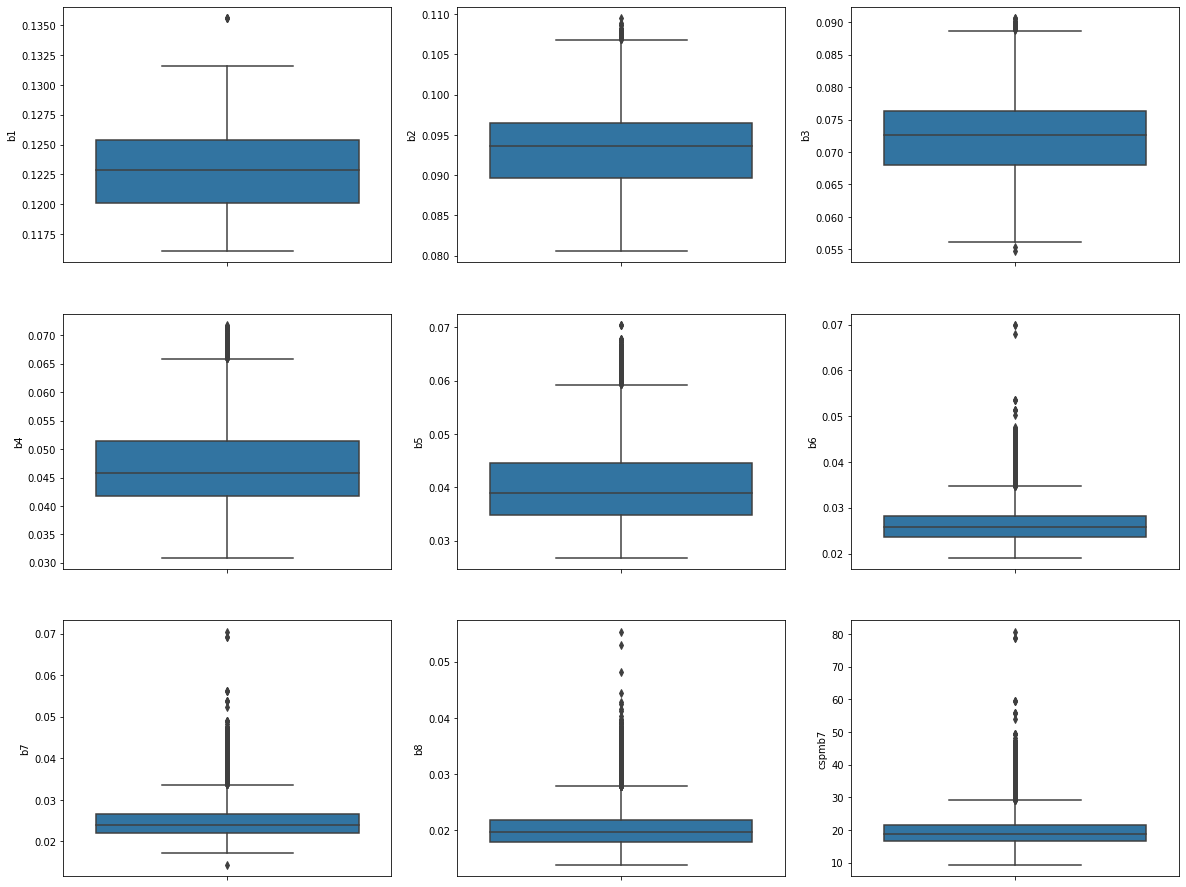

In [14]:
# Some bands  and cspm boxplot
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20, 16))
sns.boxplot(y=train.b1, ax=ax[0,0])
sns.boxplot(y=train.b2, ax=ax[0,1])
sns.boxplot(y=train.b3, ax=ax[0,2])
sns.boxplot(y=train.b4, ax=ax[1,0])
sns.boxplot(y=train.b5, ax=ax[1,1])
sns.boxplot(y=train.b6, ax=ax[1,2])
sns.boxplot(y=train.b7, ax=ax[2,0])
sns.boxplot(y=train.b8, ax=ax[2,1])
sns.boxplot(y=train.cspmb7, ax=ax[2,2])

In [31]:
only_bands_columns = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8']
train_no_outliers = train.copy()[only_bands_columns]
val_no_outliers = val.copy()[only_bands_columns]

In [35]:
clean_train = train_no_outliers[(np.abs(stats.zscore(train_no_outliers)) < 1.8).all(axis=1)]

<AxesSubplot:ylabel='b8'>

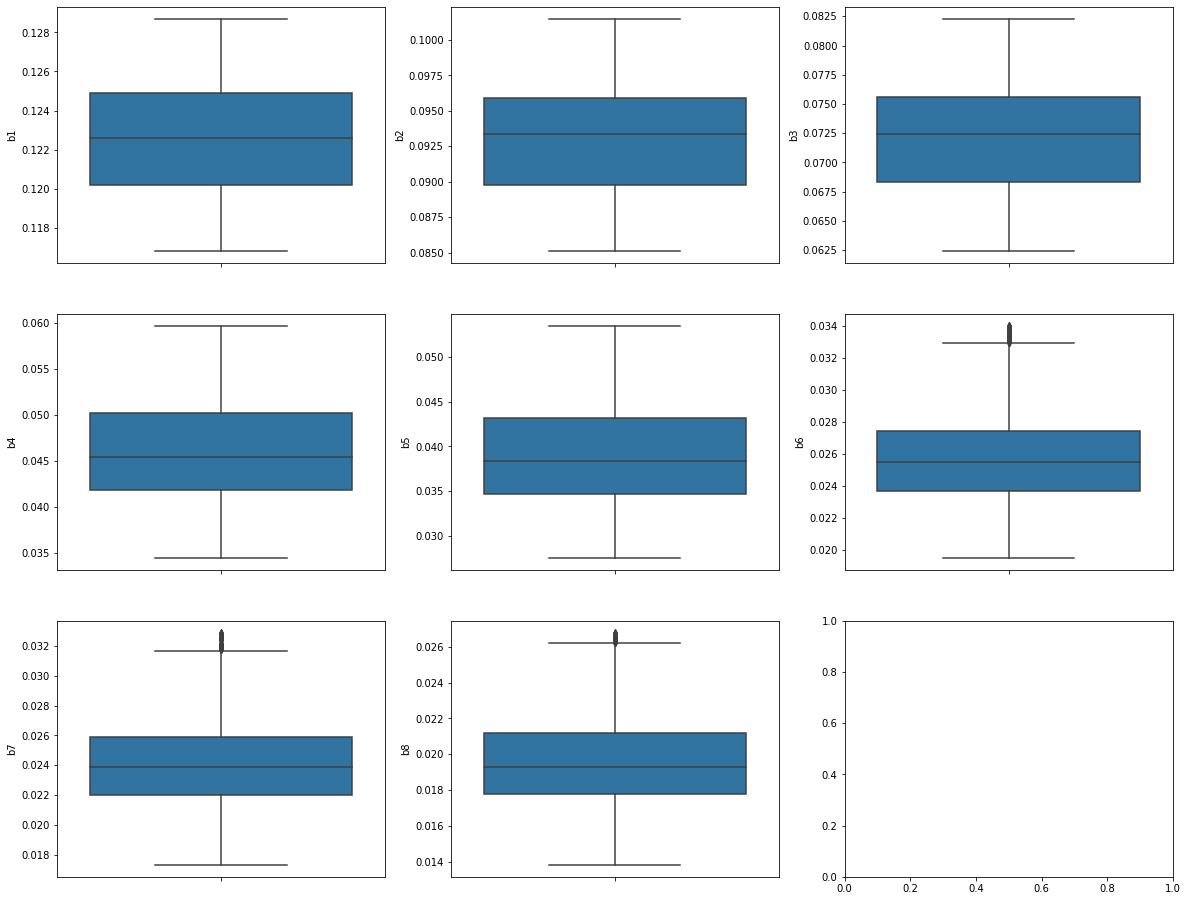

In [36]:
# Some bands  and cspm boxplot
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20, 16))
sns.boxplot(y=clean_train.b1, ax=ax[0,0])
sns.boxplot(y=clean_train.b2, ax=ax[0,1])
sns.boxplot(y=clean_train.b3, ax=ax[0,2])
sns.boxplot(y=clean_train.b4, ax=ax[1,0])
sns.boxplot(y=clean_train.b5, ax=ax[1,1])
sns.boxplot(y=clean_train.b6, ax=ax[1,2])
sns.boxplot(y=clean_train.b7, ax=ax[2,0])
sns.boxplot(y=clean_train.b8, ax=ax[2,1])